# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Загружаем данные
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
375,1375,53,NaN,Пенза,Мария,Акимычева,2018-01-04,ultra
119,1119,53,NaN,Петрозаводск,Олег,Сухарев,2018-04-22,smart
69,1069,36,NaN,Екатеринбург,Гордей,Кочетов,2018-12-10,smart
57,1057,43,NaN,Москва,Динара,Дьячкова,2018-03-12,ultra
325,1325,63,NaN,Новосибирск,Артём,Федосеев,2018-06-12,ultra
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart
170,1170,69,NaN,Новосибирск,Вадим,Козлов,2018-12-20,smart
145,1145,45,NaN,Тюмень,Юлий,Алешин,2018-04-11,smart
468,1468,29,NaN,Тамбов,Иван,Авдышев,2018-02-11,smart


In [4]:
calls.sample(10)

,id,call_date,duration,user_id
138764,1354_172,2018-08-21,0.00,1354
138604,1354_12,2018-11-17,12.40,1354
98397,1250_317,2018-04-21,6.15,1250
59121,1148_584,2018-07-12,4.31,1148
44569,1112_273,2018-12-21,10.55,1112
76653,1192_55,2018-12-07,3.58,1192
35548,1089_21,2018-07-07,9.92,1089
48668,1121_325,2018-06-29,15.85,1121
152477,1380_112,2018-08-05,0.00,1380
155993,1385_72,2018-01-19,20.72,1385


In [5]:
messages.sample(10)

,id,message_date,user_id
106145,1430_220,2018-10-08,1430
16802,1073_80,2018-12-02,1073
51812,1231_433,2018-08-16,1231
21044,1089_1047,2018-10-12,1089
79768,1333_124,2018-12-05,1333
109784,1440_725,2018-07-12,1440
84554,1354_6,2018-09-13,1354
10102,1039_758,2018-07-26,1039
90484,1375_284,2018-10-23,1375
85425,1356_442,2018-07-14,1356


In [6]:
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
78173,78173,1263_244,677.86,2018-11-27,1263
35635,35635,1124_15,950.61,2018-12-20,1124
44351,44351,1153_54,13.65,2018-10-29,1153
133191,133191,1445_22,0.00,2018-12-30,1445
8745,8745,1030_214,0.00,2018-09-13,1030
61060,61060,1207_130,363.14,2018-12-26,1207
24499,24499,1083_379,227.98,2018-07-19,1083
37725,37725,1132_98,0.00,2018-10-12,1132
143639,143639,1480_327,631.86,2018-09-12,1480
129116,129116,1431_150,71.16,2018-08-29,1431


In [7]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


# Описание данных

Таблица users (информация о пользователях):
<ol>
<li>user_id — уникальный идентификатор пользователя</li>
<li>first_name — имя пользователя</li>
<li>last_name — фамилия пользователя</li>
<li>age — возраст пользователя (годы)</li>
<li>reg_date — дата подключения тарифа (день, месяц, год)</li>
<li>churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)</li>
<li>city — город проживания пользователя</li>
tariff — название тарифного плана
</ol>
Таблица calls (информация о звонках):
<ol>
<li>id — уникальный номер звонка</li>
<li>call_date — дата звонка</li>
<li>duration — длительность звонка в минутах</li>
<li>user_id — идентификатор пользователя, сделавшего звонок</li>
    </ol>
Таблица messages (информация о сообщениях):
    <ol>
<li>id — уникальный номер сообщения</li>
<li>message_date — дата сообщения</li>
<li>user_id — идентификатор пользователя, отправившего сообщение</li>
    </ol>
Таблица internet (информация об интернет-сессиях):
<ol>
<li>id — уникальный номер сессии</li>
<li>mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)</li>
<li>session_date — дата интернет-сессии</li>
<li>user_id — идентификатор пользователя</li>
      </ol>  
Таблица tariffs (информация о тарифах):
<ol>
<li>tariff_name — название тарифа</li>
<li>rub_monthly_fee — ежемесячная абонентская плата в рублях</li>
<li>minutes_included — количество минут разговора в месяц, включённых в абонентскую плату</li>
<li>messages_included — количество сообщений в месяц, включённых в абонентскую плату</li>
<li>mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)</li>
<li>rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)</li>
<li>rub_per_message — стоимость отправки сообщения сверх тарифного пакета</li>
<li>rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)</li>
        </ol> 

# Шаг 2. Подготовка данных

### Подготовим данные в таблицах по очереди

In [8]:
# Начнем с таблицы с пользователями
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
users.describe()
# Анамальных значений не видно

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


В столбце churn_date - всего 38 заполненых значений. Согласно описаниям данных в данном столбце храниться информация 
о дате прекращения пользования тарифом. Значит в выборке все остальные пользователи действующие на момент выгрузки.

In [10]:
# Преведем даты к коректному формату
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Для этой таблицы теперь все корректно, переходим к следующей

In [12]:
# Таблица с звонками
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Переведем дату к формату дат. Округлим значение длительности вверх, согласно условиям тарифов.
Есть еще столбец с id - теоретически его можно привести к числовому, но в конкретном случае смысла не вижу: 
числовые операции производиться не будут и на хранении критично не сказывается

In [13]:
# Приведение дат
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")

In [14]:
# Приведение длительности звонков
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [15]:
calls.info()
# Все в порядке, но как мы знаем из задание в выборке есть звонки  длительностью 0
# Надо на них посмотреть

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [16]:
calls.loc[(calls['duration'] == 0)] 
# Многовато строк. Удалять не стоит. Надо заменить. Предположим, что это недозвоны. 
# Так как по тарифным условиям округление идет вверх, заменим 0 на 1 

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
9,1000_9,2018-08-15,0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0,1499
202592,1499_205,2018-10-13,0,1499
202593,1499_206,2018-12-26,0,1499
202594,1499_207,2018-10-28,0,1499


In [17]:
# Для того, что бы посмотреть как эта замена отразиться на данных выведем описательную статистику
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,7.158198,1253.940619
std,5.959173,144.722751
min,0.000000,1000.000000
25%,2.000000,1126.000000
50%,6.000000,1260.000000
75%,11.000000,1379.000000
max,38.000000,1499.000000


In [18]:
# Производим замену
calls['duration'] = calls['duration'].replace(0, 1)

In [19]:
# Смотрим на изменения
calls.describe()
# Не критично: слегка выросла средняя - приблизительно на 0,2 и приблизительно на 0,2 уменьшилось стандартное отклонение

,duration,user_id
count,202607.000000,202607.000000
mean,7.353714,1253.940619
std,5.733230,144.722751
min,1.000000,1000.000000
25%,2.000000,1126.000000
50%,6.000000,1260.000000
75%,11.000000,1379.000000
max,38.000000,1499.000000


Для этой таблицы теперь все корректно, переходим к следующей

In [20]:
# Переходи к таблице с сообщениями
messages.info()
# Также приведем дату к формату дат

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [21]:
# Приводим к формату
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [22]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [23]:
messages.describe()
# Здесь нечего смотреть

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Переходим к следующей таблице

In [24]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [25]:
# Аналогично меняем формат даты
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")

In [26]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [27]:
# Тут также есть нули. Это как? Интернет-сессия была, но мб не использовались? Посмотрим
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [28]:
internet.loc[(internet['mb_used'] == 0)] 
# Предположим здесь ту же проблему с округлением. Достаточно много таких строк
# Заменим нули на единицы. Посмотрим как это отразиться на данных

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


In [29]:
internet['mb_used'] = internet['mb_used'].replace(0, 1)

In [30]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

In [31]:
internet.describe()
# Среднее сдвигается незначительно

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.753280,1252.099842
std,43127.054745,278.212524,144.050823
min,0.000000,1.000000,1000.000000
25%,37348.750000,139.000000,1130.000000
50%,74697.500000,349.000000,1251.000000
75%,112046.250000,560.000000,1380.000000
max,149395.000000,1725.000000,1499.000000


Таблица tariffs справочная, в нее никаких исправлений вносить не надо, кроме переименования(что бы дальше можно было объединять таблицы)

In [32]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

### Необходимо посчитать для каждого пользователя:
<ol>
<li>количество сделанных звонков и израсходованных минут разговора по месяцам;</li>
<li>количество отправленных сообщений по месяцам;</li>
<li>объем израсходованного интернет-трафика по месяцам;</li>
<li>помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).</li>
    </ol>

#### Звонки

In [33]:
# Для начала добавляем месяца
calls['month'] = calls['call_date'].dt.month
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [34]:
# Сделаем группировку по пользователю и месяцу
user_calls = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index()
# Переименуем чтобы не путаться
user_calls.rename(columns={'duration':'all_calls_duration','id':'calls_in_month'}, inplace=True)

In [35]:
# Получаем количество сделанных звонков и израсходованных минут разговора по месяцам по id пользователя
user_calls.head()

,user_id,month,all_calls_duration,calls_in_month
0,1000,5,164,22
1,1000,6,187,43
2,1000,7,346,47
3,1000,8,418,52
4,1000,9,478,58


#### Сообщения

In [36]:
# Для начала добавляем месяца
messages['month'] = messages['message_date'].dt.month
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [37]:
# Сделаем группировку по пользователю и месяцу
user_messages = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()
# Переименуем для удобства
user_messages.rename(columns={'id':'sms_in_month'}, inplace=True)

In [38]:
user_messages.head()

,user_id,month,sms_in_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


#### Интернет-трафик

In [39]:
# Для начала добавляем месяца
internet['month'] = internet['session_date'].dt.month
internet

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,11
1,1,1000_1,1053,2018-09-07,1000,9
2,2,1000_2,1198,2018-06-25,1000,6
3,3,1000_3,551,2018-08-22,1000,8
4,4,1000_4,303,2018-09-24,1000,9
...,...,...,...,...,...,...
149391,149391,1499_152,319,2018-10-03,1499,10
149392,149392,1499_153,491,2018-12-14,1499,12
149393,149393,1499_154,1,2018-10-27,1499,10
149394,149394,1499_155,1247,2018-11-26,1499,11


In [40]:
# Сделаем группировку по пользователю и месяцу
user_internet = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
# Переименуем для удобства
user_internet.rename(columns={'mb_used':'internet_mb_in_month'}, inplace=True)

In [41]:
user_internet.head()

,user_id,month,internet_mb_in_month
0,1000,5,2257
1,1000,6,23262
2,1000,7,14017
3,1000,8,14072
4,1000,9,14583


#### Выручка

In [42]:
# Для подсчета выручки соединяем все полученные таблицы способом outer, чтобы ничего не потерялось
user_data = user_calls.merge(user_messages, on=['user_id','month'], how='outer')
user_data = user_data.merge(user_internet, on=['user_id','month'], how='outer')
# +Добавлям данные о пользователях и их тарифах
user_data = user_data.merge(users, on='user_id', how='left')
# + Сама информация о тарифах
user_data = user_data.merge(tariffs, on='tariff', how='left')
# Собрали все в одну таблицу
user_data

,user_id,month,all_calls_duration,calls_in_month,sms_in_month,internet_mb_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,164.0,22.0,22.0,2257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,187.0,43.0,60.0,23262.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,346.0,47.0,75.0,14017.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,418.0,52.0,81.0,14072.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,478.0,58.0,57.0,14583.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17246.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,10,NaN,NaN,21.0,19599.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,11,NaN,NaN,20.0,17526.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,12,NaN,NaN,35.0,17349.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [43]:
# Чтобы можно было считать необходимо заполнить пропуски. Просто заполняем нулями там где данные не подтянулись
user_data['sms_in_month'] = user_data['sms_in_month'].fillna(0)
user_data['internet_mb_in_month'] = user_data['internet_mb_in_month'].fillna(0)
user_data['all_calls_duration'] = user_data['all_calls_duration'].fillna(0)
user_data['calls_in_month'] = user_data['calls_in_month'].fillna(0)
user_data

,user_id,month,all_calls_duration,calls_in_month,sms_in_month,internet_mb_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,164.0,22.0,22.0,2257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,187.0,43.0,60.0,23262.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,346.0,47.0,75.0,14017.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,418.0,52.0,81.0,14072.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,478.0,58.0,57.0,14583.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17246.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,10,0.0,0.0,21.0,19599.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,11,0.0,0.0,20.0,17526.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,12,0.0,0.0,35.0,17349.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [44]:
# Переходим к расчету. Для удобства напишем функции
# Посчитаем стоимость смс за пределами тарифа
def sms(row):
    sms = (row['sms_in_month'] - row['messages_included']) * row['rub_per_message']
    if sms < 0:
        return 0
    else:
        return sms


In [45]:
# Стоимость минут за пределами тарифа
def mins(row):
    mins = (row['all_calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    if mins < 0:
        return 0
    else:
        return mins

In [46]:
# Стоимость инт ернета за пределами тарифа. Учитываем перевод из мегабайт в гигабайты и округляем вверх
def internet(row):
    internet = np.ceil((row['internet_mb_in_month'] - row['mb_per_month_included'])/1024) * row['rub_per_gb']
    if internet  < 0:
        return 0
    else:
        return internet

In [47]:
# Применяем функции для добавления новых столбцов
user_data['sms+'] = user_data.apply(sms, axis = 1)
user_data['mins+'] = user_data.apply(mins, axis = 1)
user_data['internet+'] = user_data.apply(internet, axis = 1)
user_data

,user_id,month,all_calls_duration,calls_in_month,sms_in_month,internet_mb_in_month,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sms+,mins+,internet+
0,1000,5,164.0,22.0,22.0,2257.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,6,187.0,43.0,60.0,23262.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,7,346.0,47.0,75.0,14017.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,8,418.0,52.0,81.0,14072.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,9,478.0,58.0,57.0,14583.0,52,NaT,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17246.0,35,NaT,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,0.0,0.0,400.0
3210,1489,10,0.0,0.0,21.0,19599.0,35,NaT,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,0.0,0.0,1000.0
3211,1489,11,0.0,0.0,20.0,17526.0,35,NaT,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,0.0,0.0,600.0
3212,1489,12,0.0,0.0,35.0,17349.0,35,NaT,Санкт-Петербург,Павел,...,50,15360,500,550,200,3,3,0.0,0.0,400.0


In [48]:
# Теперь находим общую сумму - складываем плату за все услуги + фиксированную стоимость тарифа
user_data['total_pay'] = user_data['sms+']+user_data['mins+']+user_data['internet+']+user_data['rub_monthly_fee']
user_data

,user_id,month,all_calls_duration,calls_in_month,sms_in_month,internet_mb_in_month,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sms+,mins+,internet+,total_pay
0,1000,5,164.0,22.0,22.0,2257.0,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,187.0,43.0,60.0,23262.0,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,346.0,47.0,75.0,14017.0,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,418.0,52.0,81.0,14072.0,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,478.0,58.0,57.0,14583.0,52,NaT,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17246.0,35,NaT,Санкт-Петербург,Павел,...,15360,500,550,200,3,3,0.0,0.0,400.0,950.0
3210,1489,10,0.0,0.0,21.0,19599.0,35,NaT,Санкт-Петербург,Павел,...,15360,500,550,200,3,3,0.0,0.0,1000.0,1550.0
3211,1489,11,0.0,0.0,20.0,17526.0,35,NaT,Санкт-Петербург,Павел,...,15360,500,550,200,3,3,0.0,0.0,600.0,1150.0
3212,1489,12,0.0,0.0,35.0,17349.0,35,NaT,Санкт-Петербург,Павел,...,15360,500,550,200,3,3,0.0,0.0,400.0,950.0


# Шаг 3. Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [49]:
# Посчитаем среднее, дисперсию и стандартное отклонение по показателям для двух тарифов
user_data.pivot_table(
    index='tariff', values=['all_calls_duration','sms_in_month','internet_mb_in_month'],\
    aggfunc={'all_calls_duration':['mean','var','std'],'sms_in_month':['mean','var','std'],'internet_mb_in_month':['mean','var','std']}
)
# Пользователи "ультры" в среднем более активны во всех категориях - смс, потреблении интернет-трафика и длительности звонков
# Но и дисперсия у них выше - значит разброс вокруг среднего больше, чем у пользователей тарифа "смарт"

all_calls_duration                            internet_mb_in_month  \
                     mean         std            var                 mean   
tariff                                                                      
smart          429.450875  194.871174   37974.774628         16237.184388   
ultra          540.779695  325.738740  106105.726823         19488.703553   

                                   sms_in_month                          
                 std           var         mean        std          var  
tariff                                                                   
smart    5879.795158  3.457199e+07    33.384029  28.227876   796.812958  
ultra   10097.107541  1.019516e+08    49.363452  47.804457  2285.266143

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


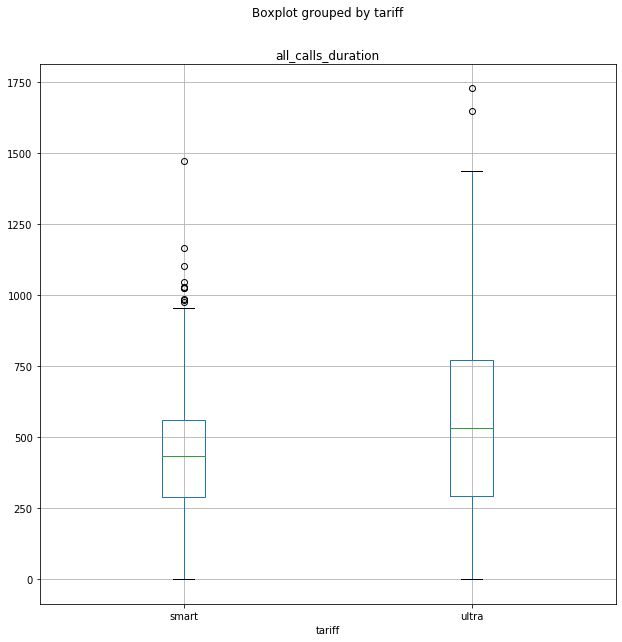

In [50]:
# Посмотрим на каждый показатель в отдельности
# Количество минут в среднем в месяц у пользователей по тарифам
plot = user_data.boxplot('all_calls_duration', by='tariff',figsize=(10,10))
# Тот же самый вывод видно наглядно - в среднем пользователи "ультры" говорят больше, но и размах показателя гораздо больше

Text(0, 0.5, 'Частота')

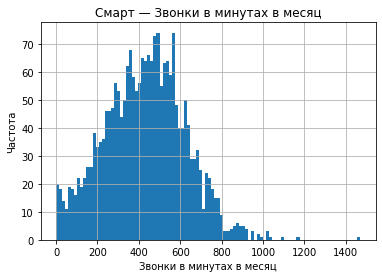

In [51]:
# Пользователи "смарта" по показателю количества минут распределены нормально с небольшим 
# "хвостом" в право - есть некоторое количество выбросов сверху
user_data[user_data['tariff'] == 'smart']['all_calls_duration'].hist(bins=100)
plt.title('Смарт — Звонки в минутах в месяц')
plt.xlabel('Звонки в минутах в месяц')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

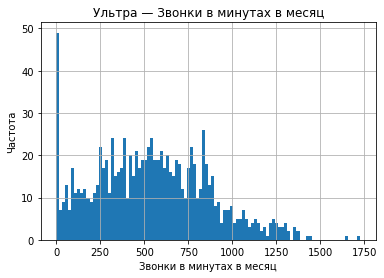

In [52]:
# Распределение среди пользователей "смарта" уже меньше похоже на нормальное
# В первую очередь за счет большого числа пользователей говоривших минуту
user_data[user_data['tariff'] == 'ultra']['all_calls_duration'].hist(bins=100)
plt.title('Ультра — Звонки в минутах в месяц')
plt.xlabel('Звонки в минутах в месяц')
plt.ylabel('Частота')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


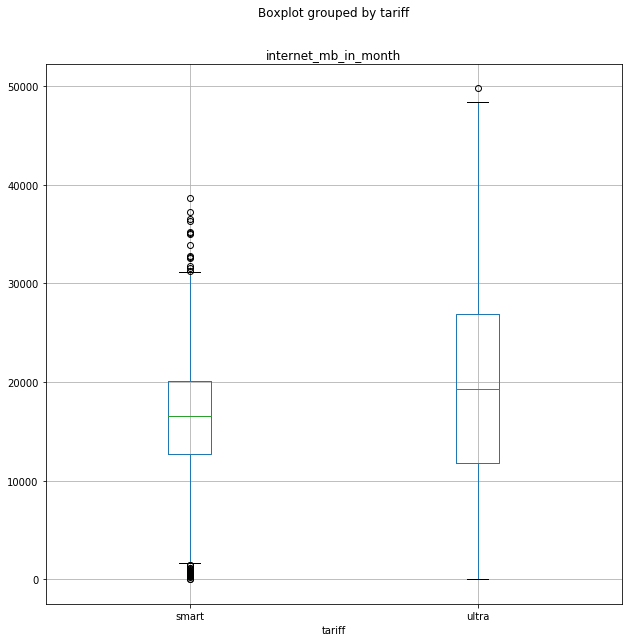

In [53]:
# По использованию интернета картина схожа, 
# но у пользователей тарифа "смарт" наблюдается гораздо большее количество выбросов - с обоих сторон
plot = user_data.boxplot('internet_mb_in_month', by='tariff',figsize=(10,10))

Text(0, 0.5, 'Частота')

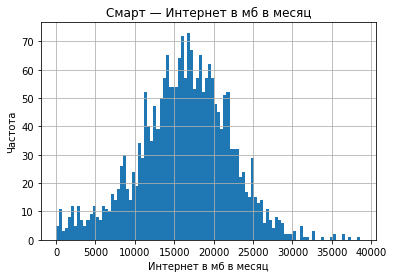

In [54]:
# Распределение также похоже на нормальное с выбросами
user_data[user_data['tariff'] == 'smart']['internet_mb_in_month'].hist(bins=100)
plt.title('Смарт — Интернет в мб в месяц')
plt.xlabel('Интернет в мб в месяц')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

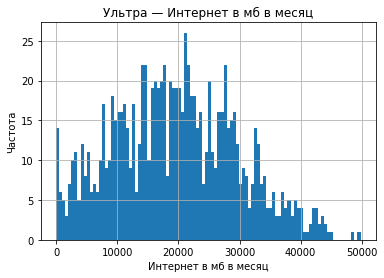

In [55]:
# Показатель имеет гораздо больший разброс вокруг средней, но распределение отдалено все же напоминает нормальное
user_data[user_data['tariff'] == 'ultra']['internet_mb_in_month'].hist(bins=100)
plt.title('Ультра — Интернет в мб в месяц')
plt.xlabel('Интернет в мб в месяц')
plt.ylabel('Частота')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


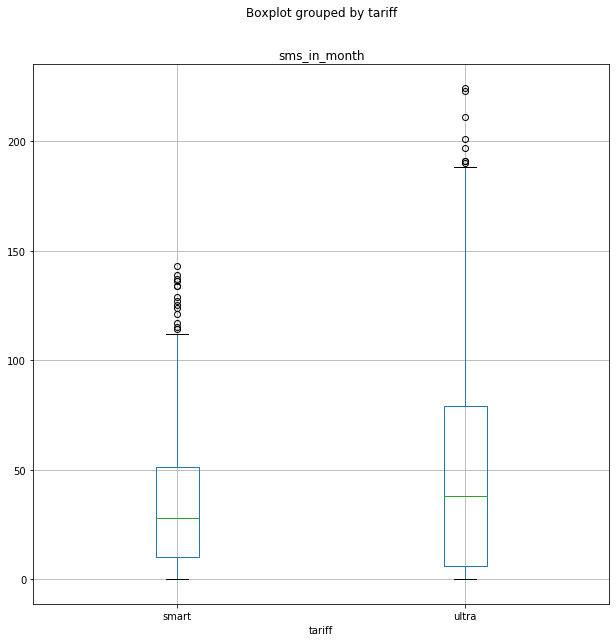

In [56]:
# Аналогично распределение по количеству отправленых смс
plot = user_data.boxplot('sms_in_month', by='tariff',figsize=(10,10))

Text(0, 0.5, 'Частота')

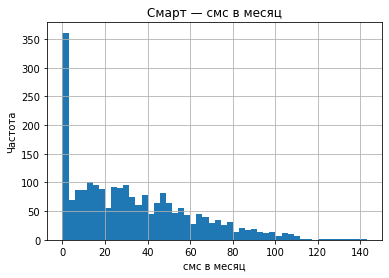

In [57]:
# а вот распределение по тарифам и смс уже отличаются
# смс не слишком популярный вид общения
user_data[user_data['tariff'] == 'smart']['sms_in_month'].hist(bins=50)
plt.title('Смарт — смс в месяц')
plt.xlabel('смс в месяц')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

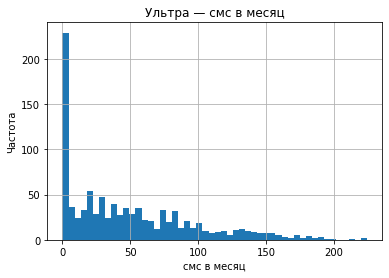

In [58]:
# пользователи тарифа "ультра" сходятся во мнении по поводу смс с пользователями "смарта"
user_data[user_data['tariff'] == 'ultra']['sms_in_month'].hist(bins=50)
plt.title('Ультра — смс в месяц')
plt.xlabel('смс в месяц')
plt.ylabel('Частота')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


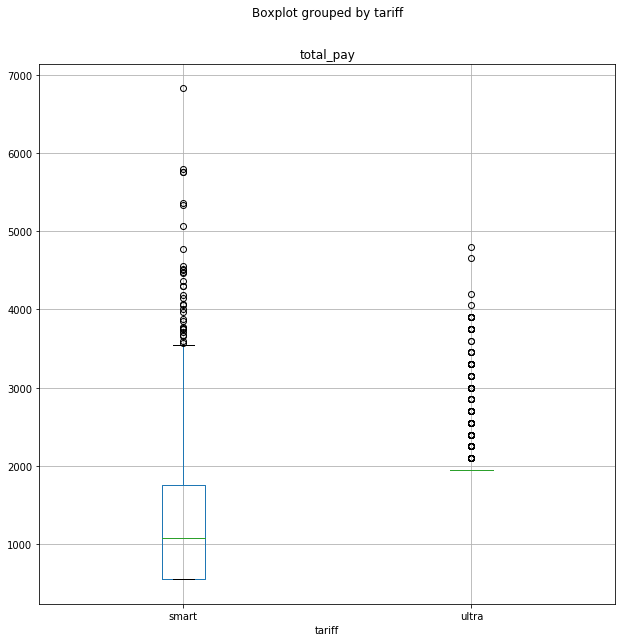

In [59]:
# Аналогично распределение по выручке
plot = user_data.boxplot('total_pay', by='tariff',figsize=(10,10))
# Видим, что по ультре среднее, медиана и квартили на уровне абонентской платы и она все равно выше средней выручки со смарта
# хотя в смарте отдельные выбросы достигают куда больших значений

In [60]:
# Посчитаем показатели по выручке
user_data.pivot_table(
    index='tariff', values='total_pay',\
    aggfunc={'total_pay':['mean','sum','count']}
)
# Суммарно смарт принес больше денег, но за счет большего количества пользователей
# Средняя выручка же больше на тарифе ультра

,count,mean,sum
tariff,,,
smart,2229,1312.512337,2925590.0
ultra,985,2071.065990,2040000.0


Text(0, 0.5, 'Частота')

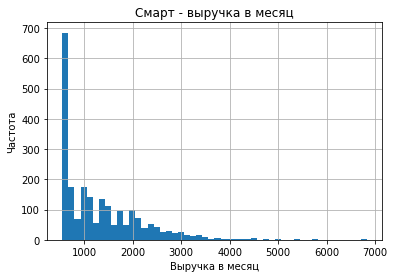

In [61]:
# Те же выводы можно сделать глядя на гистограммы
user_data[user_data['tariff'] == 'smart']['total_pay'].hist(bins=50)
plt.title('Смарт - выручка в месяц')
plt.xlabel('Выручка в месяц')
plt.ylabel('Частота')

Text(0, 0.5, 'Частота')

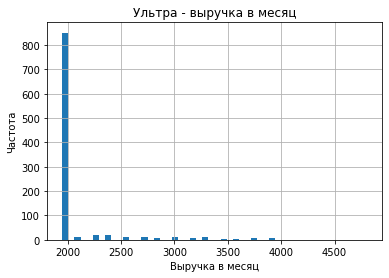

In [62]:
user_data[user_data['tariff'] == 'ultra']['total_pay'].hist(bins=50)
plt.title('Ультра - выручка в месяц')
plt.xlabel('Выручка в месяц')
plt.ylabel('Частота')

In [63]:
# КОД РЕВЬЮВЕРА

pivot_revenue = user_data.pivot_table(index = 'tariff', values = ['total_pay', 'user_id'], aggfunc = {'total_pay': np.sum, 'user_id': lambda x: x.nunique()})
pivot_revenue.columns = ['sum_revenue', 'unique_users']
pivot_revenue['revenue_per_user'] = pivot_revenue['sum_revenue'] // pivot_revenue['unique_users']
display(pivot_revenue)

# ВЫВОД: видим, что выручка на 1 клиента ультры больше

,sum_revenue,unique_users,revenue_per_user
tariff,,,
smart,2925590.0,350,8358.0
ultra,2040000.0,148,13783.0


# Шаг 4. Проверка гипотез

<ol>
<li>средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;</li>
<li>средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;</li>
    </ol>

Начнем проверку гипотез с проверки гипотезы о средней выручке. Используем scipy.stats.ttest_ind - тест для независимых выборок, так как пользователи разных тарифов не зависят друг от друга. Для проведения теста необходимо разбить данные на две выборки и избавиться от выбросов, так как они влияют на тест

In [59]:
# Разбиваем данные
ultra = user_data[user_data['tariff'] == 'ultra']
smart = user_data[user_data['tariff'] == 'smart']

In [60]:
# Найдем выбросы через квартильный размах. Начнем с "ультры"
q1 = ultra['total_pay'].quantile(0.25)                 
q3 = ultra['total_pay'].quantile(0.75)
iqr = q3 - q1
ultra = ultra[(ultra['total_pay'] >= (q1 - 1.5 * iqr)) & (ultra['total_pay'] <= (q3 + 1.5 * iqr))]
ultra = ultra['total_pay']

In [61]:
# Аналогично тариф "смарт"
q1 = smart['total_pay'].quantile(0.25)                 
q3 = smart['total_pay'].quantile(0.75)
iqr = q3 - q1
smart = smart[(smart['total_pay'] >= (q1 - 1.5 * iqr)) & (smart['total_pay'] <= (q3 + 1.5 * iqr))]
smart = smart['total_pay']

Формулируем гипотезы: H0 - различий в выручке пользователей тарифов нет. H1 - различия в выручке пользователей разных тарифов есть

In [62]:
# Задаем стандартное значение альфа
alpha = 0.05

In [63]:
# Проводим сам тест
results = st.ttest_ind(ultra, smart)

In [64]:
# Сравниваем значения
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.012746682932018e-144
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута - различия в выручке от пользователей разных тарифов неслучайны

Проверим гипотезу о различиях в выручке между пользователями из Москвы и других регионов

In [65]:
# Разбиваем данные
moscow = user_data[user_data['city'] == 'Москва']
other = user_data[user_data['city'] != 'Москва']

In [66]:
# Найдем выбросы через квартильный размах
q1 = moscow['total_pay'].quantile(0.25)                 
q3 = moscow['total_pay'].quantile(0.75)
iqr = q3 - q1
moscow = moscow[(moscow['total_pay'] >= (q1 - 1.5 * iqr)) & (moscow['total_pay'] <= (q3 + 1.5 * iqr))]
moscow = moscow['total_pay']

In [67]:
# Найдем выбросы через квартильный размах
q1 = other['total_pay'].quantile(0.25)                 
q3 = other['total_pay'].quantile(0.75)
iqr = q3 - q1
other = other[(other['total_pay'] >= (q1 - 1.5 * iqr)) & (other['total_pay'] <= (q3 + 1.5 * iqr))]
other = other['total_pay']

Формулируем гипотезы: H0 - различий в выручке пользователей Москвы и регионов нет. H1 - различия в выручке пользователей разных регионов есть

In [68]:
# Задаем стандартное значение альфа
alpha = 0.05

In [69]:
# Проводим сам тест
results = st.ttest_ind(moscow, other)

In [70]:
# Сравниваем значения
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2887252778218871
Не получилось отвергнуть нулевую гипотезу


Значимых различий в выручке пользователей Москвы и других регионов нет

# Шаг 5. Вывод

In [71]:
print(smart.describe())
print(ultra.describe())

count    2196.000000
mean     1265.984517
std       738.622250
min       550.000000
25%       550.000000
50%      1043.000000
75%      1750.000000
max      3550.000000
Name: total_pay, dtype: float64
count     851.0
mean     1950.0
std         0.0
min      1950.0
25%      1950.0
50%      1950.0
75%      1950.0
max      1950.0
Name: total_pay, dtype: float64


Тарифы "смарт" и "ультра" имеют существеные различия. Средняя выручка с клиента ультра равна 1950 - ровно месячной абонентной плате. По описательной статистике видим, что такое же значение минимума, максимума и всех квартилей. Можно сделать вывод, что абоненты "ультры" не выходят за границы пакета предлагаемых им услуг. Обратная ситуация с тарифом "смарт". Средняя выручка с клиента на этом тарифе 1259 рублей, что значительно выше ежемесячной абонентской платы в 550 рублей, при этом медианая цифра 1032. Это знначит, что практически половина пользователей этого тарифа переплачивает свою абонентскую плату почти в два раза.
При этом среднее для тарифа "смарт" существенно меньше среднего тарифа "ультра". Однако максимальная прибыль с тарифа "смарт" 3515 существенно больше абонентской платы тарифа "ультра". Вывод: по средней плате тариф "ультра" выгоднее компании, однако за счет большого разброса один случайный клиент тарифа "смарт" может принести гораздо больше выручки, чем средний клиент "ультры"